# Star Wars - *Empire Strikes Back* Best Ever?

##### By David VanHeeswijk

This project attempts to see whether or not the Empire Strikes Back is the best movie of the Star Wars movie franchise. We will be exploring data collected from a survey of avid fans of the series to discuss whether **The Empire Strikes Back** is the greatest Star Wars movie (at least prior to *The Force Awakens* coming out).

Our project will be a showcase of data cleaning techniques and attempt to analyze the following question:

* Does America think that *The Empire Strikes Back* is the best Star Wars movie?

We will start by reading in our data set and doing some initial examing of the data frame that we create.

In [145]:
import pandas as pd

star_wars = pd.read_csv('star_wars.csv',encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

### Cleaning the Data

In [146]:
star_wars['RespondentID'] = star_wars['RespondentID'].notnull()

In [147]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       0
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

In [148]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique()

array(['Response', 'Yes', 'No'], dtype=object)

Our last two steps have been to clean up the initial data. We first removed all entries whose Respondent ID was null. Now we are going to change the answer types from 'Yes' and 'No' to 'True' and 'False'.

In [149]:
yes_no = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [150]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique()

array([nan, True, False], dtype=object)

In [151]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique()

array([nan, True, False], dtype=object)

After changing the values to boolean values, we will now move on to the next columns, which all deal with answers related to which Star Wars movies each respondent has seen. We will also rename each of the columns to match the movie that is in question, rather than the full question as it is stated.

In [152]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [153]:
star_wars['Unnamed: 4'].unique()

array(['Star Wars: Episode II  Attack of the Clones', nan], dtype=object)

In [154]:
import numpy as np

ep_1 = {
    'Star Wars: Episode I  The Phantom Menace' : True,
    np.NaN : False
}
ep_2 = {
    'Star Wars: Episode II  Attack of the Clones' : True,
    np.NaN : False
}
ep_3 = {
    'Star Wars: Episode III  Revenge of the Sith' : True,
    np.NaN : False
}
ep_4 = {
    'Star Wars: Episode IV  A New Hope' : True,
    np.NaN : False
}
ep_5 = {
    'Star Wars: Episode V The Empire Strikes Back' : True,
    np.NaN : False
}
ep_6 = {
    'Star Wars: Episode VI Return of the Jedi' : True,
    np.NaN : False
}

In [155]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1','Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'})


In [156]:
star_wars['seen_1'] = star_wars['seen_1'].map(ep_1)
star_wars['seen_2'] = star_wars['seen_2'].map(ep_2)
star_wars['seen_3'] = star_wars['seen_3'].map(ep_3)
star_wars['seen_4'] = star_wars['seen_4'].map(ep_4)
star_wars['seen_5'] = star_wars['seen_5'].map(ep_5)
star_wars['seen_6'] = star_wars['seen_6'].map(ep_6)


In [157]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,True,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,True,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,True,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,True,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,True,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic


Now that we have columns that all display boolean values as well as new column names corresponding to each movie in the series, we move to the next 6 columns, which rank the Star Wars movies from 1-6. We will now convert the string values to numeric so that we can analyze this data more effectively.

In [158]:
# Removing the first line, which is not one of the respondents' surveys
star_wars = star_wars.loc[1:]
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [159]:
star_wars[star_wars.columns[9:15]]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


In [160]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ep_1_ranking','Unnamed: 10':'ep_2_ranking','Unnamed: 11':'ep_3_ranking','Unnamed: 12':'ep_4_ranking','Unnamed: 13':'ep_5_ranking','Unnamed: 14':'ep_6_ranking'})

All the rankings are now converted to numbers and our columns have been renamed to match which movie is being ranked. Now, we will be able to see the average ranking for each movie.

### Analysis of the rankings for each movie

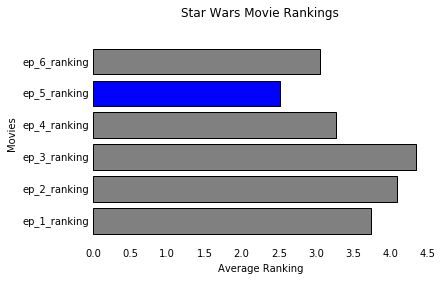

In [212]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

cols = ['ep_1_ranking','ep_2_ranking','ep_3_ranking','ep_4_ranking','ep_5_ranking','ep_6_ranking']

bar_widths = [star_wars[i].mean(skipna=True) for i in cols]
bar_positions = arange(6) + 0.75
tick_positions = range(1,8)
colors = ['gray', 'gray', 'gray', 'gray', 'blue', 'gray']


fig, ax = plt.subplots()
rects = ax.barh(bar_positions,bar_widths,align='center',color = colors, tick_label = cols)
ax.set_title('Star Wars Movie Rankings')
ax.set_ylabel('Movies')
ax.set_xlabel('Average Ranking')
ax.spines['right'].set_visible(False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom='off',left='off',right='off',top='off')

plt.show()

As we see in our bar chart above, Episode VI: The Empire Strikes Back, actually ranks lowest out of all the movies on the list, which means that it ranks the best out of all our movies in the Star Wars world according to our survey! Thus we can confirm:
* **The Empire Strikes Back is the best rated movie according to the survey**

Just to confirm that this hold true generally, we should go ahead and check the columns that correspond to whether each movie has been seen or not. We will explore this info below.

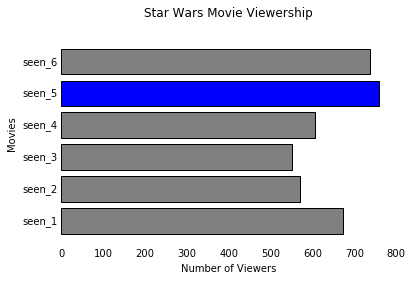

In [215]:
cols = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']

bar_widths = [star_wars[i].sum() for i in cols]
bar_positions = arange(6) + 0.75
tick_positions = range(1,8)
colors = ['gray', 'gray', 'gray', 'gray', 'blue', 'gray']


fig, ax = plt.subplots()
rects = ax.barh(bar_positions,bar_widths,align='center',color = colors, tick_label = cols)
ax.set_title('Star Wars Movie Viewership')
ax.set_ylabel('Movies')
ax.set_xlabel('Number of Viewers')
ax.spines['right'].set_visible(False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom='off',left='off',right='off',top='off')

plt.show()

Not only did we confirm it was the best rated movie, but the chart above confirms it is also the most watched movie out of the first 6 episodes!

### Male vs Female viewers

Suppose we want to go one step further, and categorize male vs female respondants to see if there is any difference in the most viewed movies or rankings. We can do this by making two data frames, male and female, that relate to these subgroups.

In [214]:
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

#### Male viewer analysis vs Female viewer analysis

/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


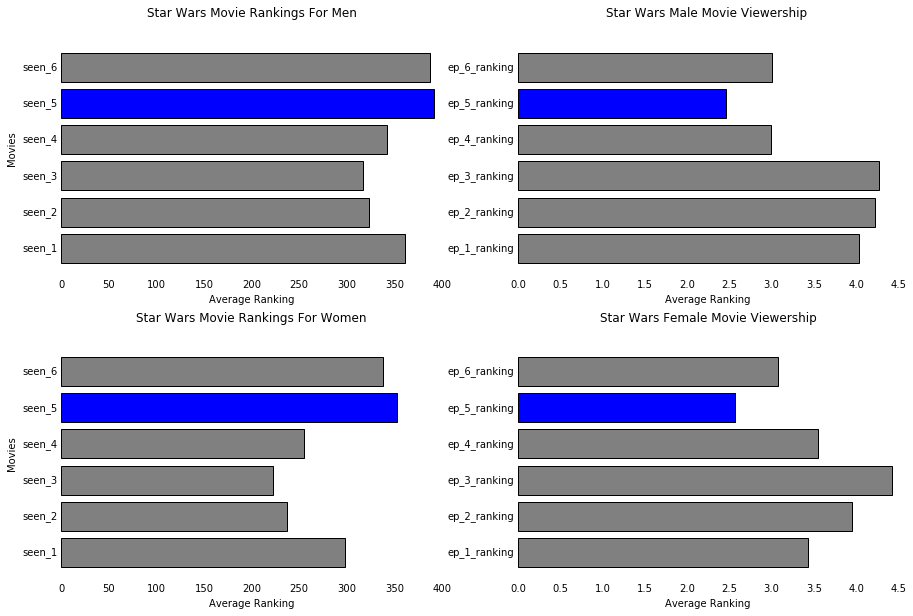

In [229]:
cols_seen = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']

bar_widths_seen = [male[i].sum() for i in cols_seen]
bar_widths_seen_f = [female[i].sum() for i in cols_seen]

bar_positions = arange(6) + 0.75
tick_positions = range(1,8)
colors = ['gray', 'gray', 'gray', 'gray', 'blue', 'gray']


fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.barh(bar_positions,bar_widths_seen,align='center',color = colors, tick_label = cols_seen)
ax1.set_title('Star Wars Movie Rankings For Men')
ax1.set_ylabel('Movies')
ax1.set_xlabel('Average Ranking')
ax1.spines['right'].set_visible(False)
for key, spine in ax1.spines.items():
    spine.set_visible(False)
ax1.tick_params(bottom='off',left='off',right='off',top='off')

cols = ['ep_1_ranking','ep_2_ranking','ep_3_ranking','ep_4_ranking','ep_5_ranking','ep_6_ranking']

bar_widths = [male[i].mean(skipna=True) for i in cols]
bar_positions = arange(6) + 0.75
tick_positions = range(1,8)
colors = ['gray', 'gray', 'gray', 'gray', 'blue', 'gray']

ax2.barh(bar_positions,bar_widths,align='center',color = colors, tick_label = cols)
ax2.set_title('Star Wars Male Movie Viewership ')
# ax2.set_ylabel('Movies')
ax2.set_xlabel('Average Ranking')
ax2.spines['right'].set_visible(False)
for key, spine in ax2.spines.items():
    spine.set_visible(False)
ax2.tick_params(bottom='off',left='off',right='off',top='off')



ax3.barh(bar_positions,bar_widths_seen_f,align='center',color = colors, tick_label = cols_seen)
ax3.set_title('Star Wars Movie Rankings For Women')
ax3.set_ylabel('Movies')
ax3.set_xlabel('Average Ranking')
ax3.spines['right'].set_visible(False)
for key, spine in ax3.spines.items():
    spine.set_visible(False)
ax3.tick_params(bottom='off',left='off',right='off',top='off')

cols = ['ep_1_ranking','ep_2_ranking','ep_3_ranking','ep_4_ranking','ep_5_ranking','ep_6_ranking']

bar_widths_f = [female[i].mean(skipna=True) for i in cols]
bar_positions = arange(6) + 0.75
tick_positions = range(1,8)
colors = ['gray', 'gray', 'gray', 'gray', 'blue', 'gray']

ax4.barh(bar_positions,bar_widths_f,align='center',color = colors, tick_label = cols)
ax4.set_title('Star Wars Female Movie Viewership')
# ax4.set_ylabel('Movies')
ax4.set_xlabel('Average Ranking')
ax4.spines['right'].set_visible(False)
for key, spine in ax4.spines.items():
    spine.set_visible(False)
ax4.tick_params(bottom='off',left='off',right='off',top='off')

fig.show()

With the 4 charts above, we have a few observations that we find:
* Female viewers were slightly fewer then males, but not by a great amount overall
* Female and male viewers both watched The Empire Strikes back the most
* The rankings for the the two groups is nearly identical with the only exceptions being Ep 1 and Ep 4. Females rank Ep 1 higher than males, while the opposite is true of Ep 4.

### Conclusion

What we found in this exploration into Star Wars Survey Data is that The Empire Strikes Back reigns supreme. It is not only the most popular of the movies in the franchise, it is also the highest rated movie. Additionally, we also found that females and males are almost identically interested in the Star Wars movies. The only noticeable difference being that Female viewers tend to like Ep 1 slightly more than their male counterparts, while male viewers tend to like Ep 4 slightly more than female viewers.

For future analysis, we will look to explore other demographic comparisons, including education levels, locations, and others.